In [1]:
import sys
import os
import datetime
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import calendar
import seaborn as sns; sns.set_theme()

from datetime import date

# Scraping S&P 500 Companies

In [2]:
data = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')

In [3]:
table = data[0]
table.head()

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989


In [4]:
tickers = table['Symbol'].tolist()
tickers

['MMM',
 'AOS',
 'ABT',
 'ABBV',
 'ACN',
 'ATVI',
 'ADM',
 'ADBE',
 'ADP',
 'AAP',
 'AES',
 'AFL',
 'A',
 'APD',
 'AKAM',
 'ALK',
 'ALB',
 'ARE',
 'ALGN',
 'ALLE',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AMD',
 'AEE',
 'AAL',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'ABC',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'ANSS',
 'AON',
 'APA',
 'AAPL',
 'AMAT',
 'APTV',
 'ACGL',
 'ANET',
 'AJG',
 'AIZ',
 'T',
 'ATO',
 'ADSK',
 'AZO',
 'AVB',
 'AVY',
 'AXON',
 'BKR',
 'BALL',
 'BAC',
 'BBWI',
 'BAX',
 'BDX',
 'WRB',
 'BRK.B',
 'BBY',
 'BIO',
 'TECH',
 'BIIB',
 'BLK',
 'BK',
 'BA',
 'BKNG',
 'BWA',
 'BXP',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BRO',
 'BF.B',
 'BG',
 'CHRW',
 'CDNS',
 'CZR',
 'CPT',
 'CPB',
 'COF',
 'CAH',
 'KMX',
 'CCL',
 'CARR',
 'CTLT',
 'CAT',
 'CBOE',
 'CBRE',
 'CDW',
 'CE',
 'CNC',
 'CNP',
 'CDAY',
 'CF',
 'CRL',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'CL',

# S&P 500 Index Price History

In [5]:
sp500 = yf.Ticker("SPY")

# get stock info
sp500.info

# get historical market data
sp500 = sp500.history(period="max")["Close"]

In [6]:
sp500 = sp500.resample("M").last()
returns = sp500.pct_change().reset_index()
returns['M'] = returns["Date"].dt.month
returns['Y'] = returns["Date"].dt.year
returns

,Date,Close,M,Y
0,1993-01-31 00:00:00-05:00,NaN,1,1993
1,1993-02-28 00:00:00-05:00,0.010669,2,1993
2,1993-03-31 00:00:00-05:00,0.022399,3,1993
3,1993-04-30 00:00:00-04:00,-0.025588,4,1993
4,1993-05-31 00:00:00-04:00,0.026970,5,1993
...,...,...,...,...
360,2023-01-31 00:00:00-05:00,0.062887,1,2023
361,2023-02-28 00:00:00-05:00,-0.025143,2,2023
362,2023-03-31 00:00:00-04:00,0.037078,3,2023
363,2023-04-30 00:00:00-04:00,0.015975,4,2023


In [7]:
heatmap_ret = pd.pivot_table(returns, index='Y', columns='M', values=["Close"])

In [8]:
heatmap_ret.columns = [calendar.month_name[i] for i in range(1,13) ]

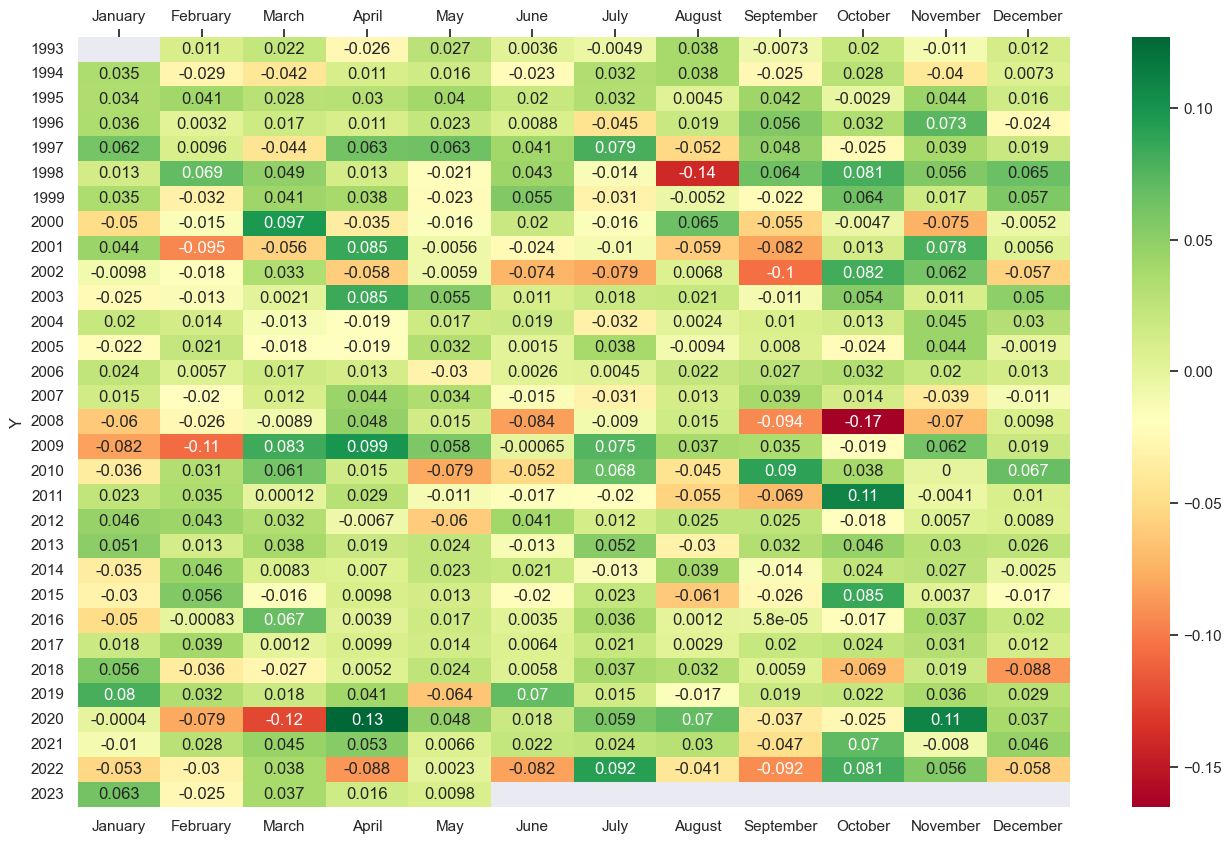

In [9]:
plt.figure(figsize=(16, 10))
ax = sns.heatmap(heatmap_ret, cmap='RdYlGn', annot=True)
ax.tick_params(top=True, labeltop=True)